In [1]:
import torch
import torch.nn as nn
import torchvision.models as models

# Define the path to the saved model file
model_path = r'C:\Users\gdk14\Desktop\gruhit college\Healthcare Analytics sem 4\yoga pose detection\resnet_model2.pth'

# Initialize the ResNet-18 model
model = models.resnet18(pretrained=True)

# Set the number of classes to match the original model
num_classes = 47

# Replace the output layer with a new fully connected layer
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Load the model's parameters
model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
model.eval()

# Now you can use this model for inference in your new notebook


C:\Users\gdk14\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\gdk14\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torchvision.datasets as datasets

In [3]:
# Define the path to the saved model file
model_path = r'C:\Users\gdk14\Desktop\gruhit college\Healthcare Analytics sem 4\yoga pose detection\resnet_model2.pth'

# Define number of classes for your new task
num_classes = 47

# Initialize the ResNet-18 model
model = models.resnet18(pretrained=True)


In [4]:
# Freeze the parameters of the pretrained layers
for param in model.parameters():
    param.requires_grad = False


In [5]:
# Replace the output layer with a new fully connected layer
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Load the model's parameters
model.load_state_dict(torch.load(model_path))

# Set the model to training mode
model.train()

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
from torch.utils.data import DataLoader, random_split

dataset_path = r'C:\Users\gdk14\Desktop\gruhit college\Healthcare Analytics sem 4\yoga pose detection\data'

# Define the transformation for your dataset
data_transform = transforms.Compose([
    # define your transformations here
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load the dataset
dataset = datasets.ImageFolder(root=dataset_path, transform=data_transform)

# Calculate the sizes of each split
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

# Split the dataset into train, validation, and test sets
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])

# Define data loaders for each split
batch_size = 32  # Adjust batch size as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [7]:
# Train the model
num_epochs = 10
for epoch in range(num_epochs):
    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validate the model
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            val_loss += criterion(outputs, labels).item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Validation Loss: {val_loss/len(val_loader):.4f}, Validation Accuracy: {(correct/total)*100:.2f}%")

C:\Users\gdk14\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Epoch [1/10], Loss: 0.0094, Validation Loss: 0.0539, Validation Accuracy: 97.82%
Epoch [2/10], Loss: 0.0002, Validation Loss: 0.0558, Validation Accuracy: 97.64%
Epoch [3/10], Loss: 0.0511, Validation Loss: 0.0584, Validation Accuracy: 97.64%
Epoch [4/10], Loss: 0.3040, Validation Loss: 0.0673, Validation Accuracy: 97.28%
Epoch [5/10], Loss: 0.0407, Validation Loss: 0.0645, Validation Accuracy: 98.00%
Epoch [6/10], Loss: 0.0206, Validation Loss: 0.0678, Validation Accuracy: 98.00%
Epoch [7/10], Loss: 0.0068, Validation Loss: 0.0652, Validation Accuracy: 97.64%
Epoch [8/10], Loss: 0.0023, Validation Loss: 0.0671, Validation Accuracy: 97.64%
Epoch [9/10], Loss: 0.0250, Validation Loss: 0.0741, Validation Accuracy: 97.10%
Epoch [10/10], Loss: 0.2023, Validation Loss: 0.0601, Validation Accuracy: 98.00%


In [10]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Validation
model.eval()
val_correct = 0
val_total = 0
val_predictions = []
val_targets = []

with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        val_total += labels.size(0)
        val_correct += (predicted == labels).sum().item()
        
        val_predictions.extend(predicted.cpu().numpy())
        val_targets.extend(labels.cpu().numpy())

val_accuracy = val_correct / val_total
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Calculate confusion matrix
conf_matrix = confusion_matrix(val_targets, val_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate F1 score
f1 = f1_score(val_targets, val_predictions, average='macro')
print(f"F1 Score: {f1:.4f}")

# Generate classification report
class_names = dataset.classes
report = classification_report(val_targets, val_predictions, labels=np.unique(val_targets), target_names=class_names)
print("Classification Report:")
print(report)


C:\Users\gdk14\anaconda3\Lib\site-packages\PIL\Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Validation Accuracy: 0.9800
Confusion Matrix:
[[11  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  1]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  9  0]
 [ 0  0  0 ...  0  0 17]]
F1 Score: 0.9792
Classification Report:
                               precision    recall  f1-score   support

         Adho Mukha Svanasana       1.00      1.00      1.00        11
         Adho Mukha Vrksasana       0.92      0.92      0.92        12
                    Alanasana       1.00      1.00      1.00         2
                 Anjaneyasana       1.00      1.00      1.00        15
            Ardha Chandrasana       1.00      1.00      1.00        13
         Ardha Matsyendrasana       1.00      0.96      0.98        23
               Ardha Navasana       0.80      1.00      0.89         4
      Ardha Pincha Mayurasana       1.00      1.00      1.00         9
            Ashta Chandrasana       1.00      1.00      1.00         2
              Baddha Konasana       0.94      1

C:\Users\gdk14\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:2555: UserWarning: labels size, 46, does not match size of target_names, 47
  warnings.warn(


In [11]:
# Test the model
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_accuracy = 100 * test_correct / test_total
print(f"Test Accuracy: {test_accuracy:.2f}%")


Test Accuracy: 94.93%


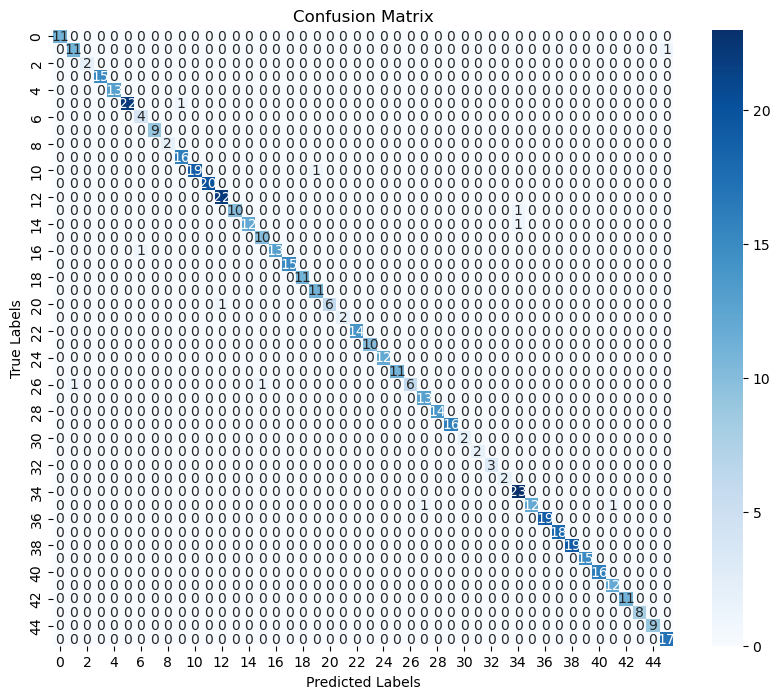

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix as heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [16]:
import torch

# Define the file path where you want to save the model
model_path = r'C:\Users\gdk14\Desktop\gruhit college\Healthcare Analytics sem 4\yoga pose detection\tlmodel.pth'

# Save the model
torch.save(model.state_dict(), model_path)

print("Model saved successfully.")


Model saved successfully.
